
🔹 First 5 rows of the dataset:
  Building_ID     Location Building_Type  Pre_Automation_Energy_kWh  \
0        B001     Hamilton      Hospital              283029.570621   
1        B002       London        Office              191283.295897   
2        B003  Mississauga         Hotel              224162.705969   
3        B004       London        School              280624.845294   
4        B005       London        School              226809.658578   

   Post_Automation_Energy_kWh  Peak_Demand_Reduction_MW HVAC_System_Type  \
0               207601.204103                 75.428367  Smart Automated   
1               137898.723357                 53.384573      Traditional   
2               185446.679558                 38.716026      Traditional   
3               236088.319996                 44.536525      Traditional   
4               160199.569550                 66.610089  Smart Automated   

   Automation_Efficiency_%  Cost_Savings_$  CO2_Reduction_Metric_Tons  
0           

C:\Users\bhupe\AppData\Local\Temp\ipykernel_20084\1298470945.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="HVAC_System_Type", data=df, palette="coolwarm")


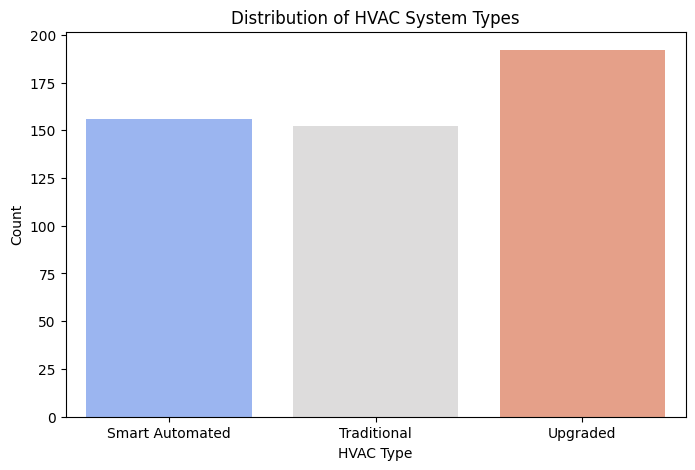

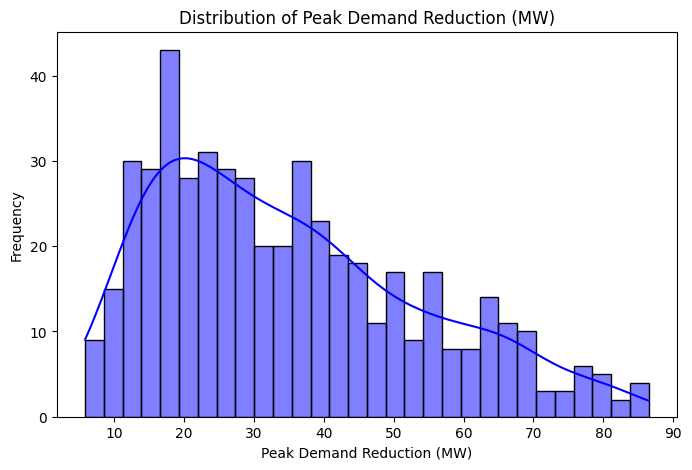

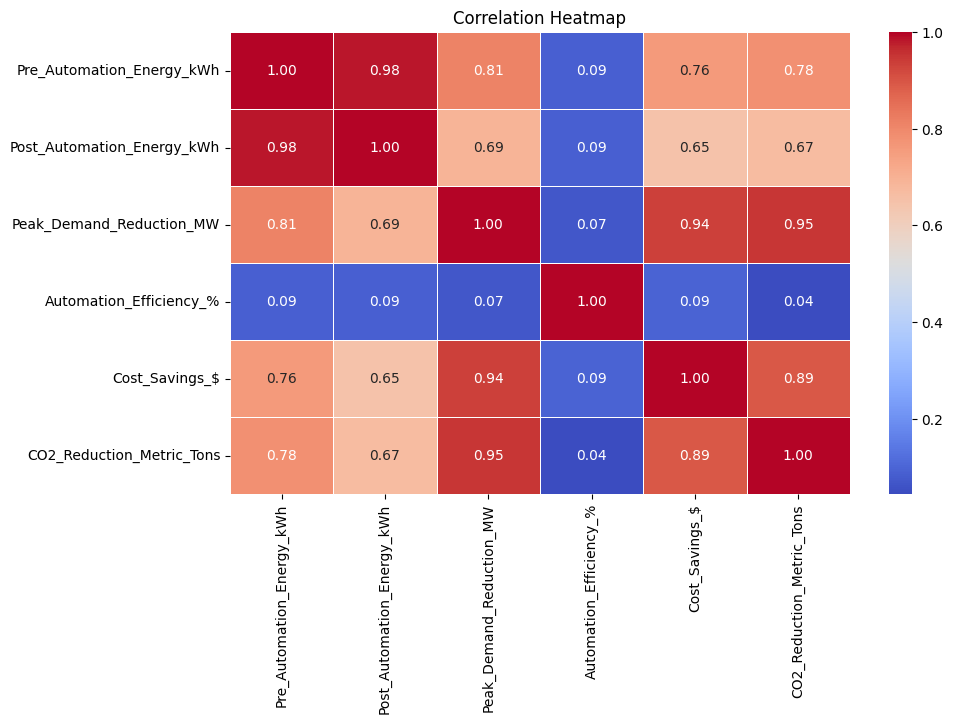


🔹 T-Test Results: t-statistic = 1.552, p-value = 0.12172
❌ No significant difference detected.

🔹 ANOVA Results: F-statistic = 1.698, p-value = 0.18415
❌ No significant difference detected.

🔹 Correlation between Cost Savings & Automation Efficiency = 0.094, p-value = 0.03510
✅ Significant correlation detected between Cost Savings and Automation Efficiency.

🔹 Regression Analysis Results:
                               OLS Regression Results                               
Dep. Variable:     Peak_Demand_Reduction_MW   R-squared:                       0.005
Model:                                  OLS   Adj. R-squared:                  0.001
Method:                       Least Squares   F-statistic:                     1.370
Date:                      Sun, 09 Mar 2025   Prob (F-statistic):              0.255
Time:                              22:59:11   Log-Likelihood:                -2175.7
No. Observations:                       500   AIC:                             4357.
Df Residuals

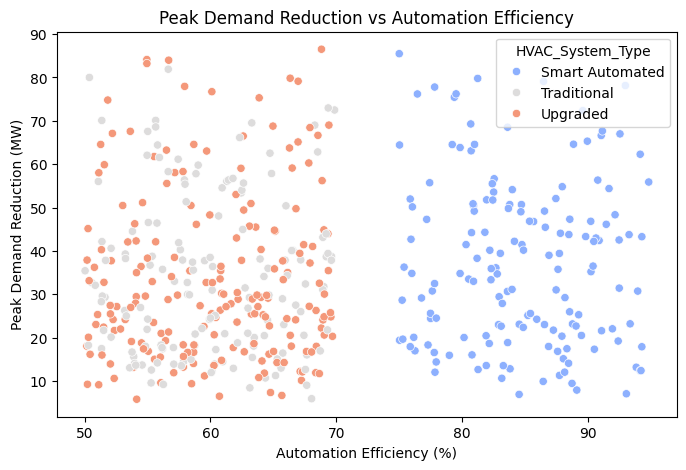

C:\Users\bhupe\AppData\Local\Temp\ipykernel_20084\1298470945.py:128: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="HVAC_System_Type", y="Peak_Demand_Reduction_MW", data=df, palette="coolwarm")


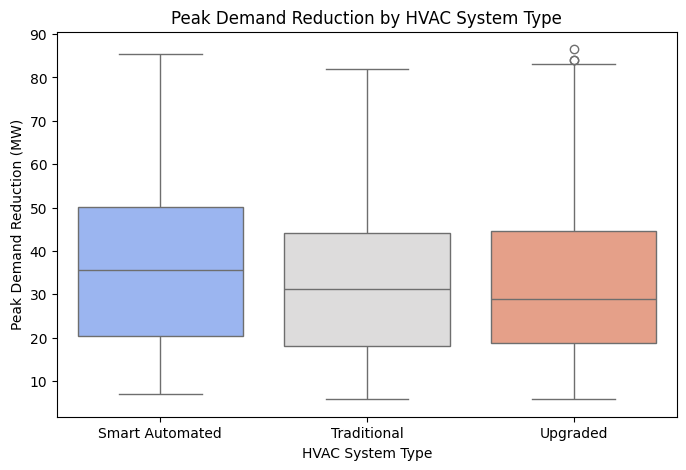

In [7]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, f_oneway, pearsonr
import statsmodels.api as sm

# ==============================
# 📌 Step 1: Load Dataset & Initial Checks
# ==============================

# Load the synthetic HVAC dataset
df = pd.read_csv("./data/HVAC_dataset.csv")

# Display the first few rows of the dataset
print("\n🔹 First 5 rows of the dataset:")
print(df.head())

# Check for missing values
print("\n🔹 Missing Values:")
print(df.isnull().sum())

# Summary statistics of numerical variables
print("\n🔹 Summary Statistics:")
print(df.describe())

# ==============================
# 📌 Step 2: Exploratory Data Analysis (EDA)
# ==============================

# 🔹 Countplot: Distribution of HVAC System Types
plt.figure(figsize=(8, 5))
sns.countplot(x="HVAC_System_Type", data=df, palette="coolwarm")
plt.title("Distribution of HVAC System Types")
plt.xlabel("HVAC Type")
plt.ylabel("Count")
plt.show()

# 🔹 Histogram: Distribution of Peak Demand Reduction (MW)
plt.figure(figsize=(8, 5))
sns.histplot(df["Peak_Demand_Reduction_MW"], bins=30, kde=True, color="blue")
plt.title("Distribution of Peak Demand Reduction (MW)")
plt.xlabel("Peak Demand Reduction (MW)")
plt.ylabel("Frequency")
plt.show()

# 🔹 Correlation Heatmap
plt.figure(figsize=(10, 6))
# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=np.number)
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

# ==============================
# 📌 Step 3: Statistical Tests for Comparisons
# ==============================

# 🔹 T-Test: Comparing Energy Savings Between Smart Automated vs Traditional HVAC
smart_automation = df[df["HVAC_System_Type"] == "Smart Automated"]["Pre_Automation_Energy_kWh"] - \
                   df[df["HVAC_System_Type"] == "Smart Automated"]["Post_Automation_Energy_kWh"]

traditional_hvac = df[df["HVAC_System_Type"] == "Traditional"]["Pre_Automation_Energy_kWh"] - \
                   df[df["HVAC_System_Type"] == "Traditional"]["Post_Automation_Energy_kWh"]

# Perform independent t-test
t_stat, p_value = ttest_ind(smart_automation, traditional_hvac, equal_var=False)
print(f"\n🔹 T-Test Results: t-statistic = {t_stat:.3f}, p-value = {p_value:.5f}")
if p_value < 0.05:
    print("✅ Significant difference: Smart automation saves more energy than traditional HVAC.")
else:
    print("❌ No significant difference detected.")

# 🔹 ANOVA: Checking if Peak Demand Reduction differs across HVAC types
anova_stat, anova_p = f_oneway(
    df[df["HVAC_System_Type"] == "Smart Automated"]["Peak_Demand_Reduction_MW"],
    df[df["HVAC_System_Type"] == "Traditional"]["Peak_Demand_Reduction_MW"],
    df[df["HVAC_System_Type"] == "Upgraded"]["Peak_Demand_Reduction_MW"]
)
print(f"\n🔹 ANOVA Results: F-statistic = {anova_stat:.3f}, p-value = {anova_p:.5f}")
if anova_p < 0.05:
    print("✅ Significant differences exist in Peak Demand Reduction across HVAC types.")
else:
    print("❌ No significant difference detected.")

# 🔹 Pearson Correlation: Checking relationship between Cost Savings & Automation Efficiency
corr_coeff, corr_p = pearsonr(df["Cost_Savings_$"], df["Automation_Efficiency_%"])
print(f"\n🔹 Correlation between Cost Savings & Automation Efficiency = {corr_coeff:.3f}, p-value = {corr_p:.5f}")
if corr_p < 0.05:
    print("✅ Significant correlation detected between Cost Savings and Automation Efficiency.")
else:
    print("❌ No strong correlation detected.")

# ==============================
# 📌 Step 4: Hypothesis Evaluation using Regression
# ==============================

# Convert categorical HVAC system type into numerical values for regression
df["HVAC_System_Type_Num"] = df["HVAC_System_Type"].map({"Traditional": 0, "Upgraded": 1, "Smart Automated": 2})

# Define independent variables (X) and dependent variable (Y)
X = df[["Automation_Efficiency_%", "HVAC_System_Type_Num"]]
X = sm.add_constant(X)  # Add intercept for regression model
y = df["Peak_Demand_Reduction_MW"]

# Fit the regression model
model = sm.OLS(y, X).fit()

# Display regression summary
print("\n🔹 Regression Analysis Results:")
print(model.summary())

# ==============================
# 📌 Step 5: Visualizing Regression Results
# ==============================

# 🔹 Scatter plot: Peak Demand Reduction vs Automation Efficiency
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["Automation_Efficiency_%"], y=df["Peak_Demand_Reduction_MW"], hue=df["HVAC_System_Type"], palette="coolwarm")
plt.title("Peak Demand Reduction vs Automation Efficiency")
plt.xlabel("Automation Efficiency (%)")
plt.ylabel("Peak Demand Reduction (MW)")
plt.show()

# 🔹 Boxplot: Peak Demand Reduction for Different HVAC Systems
plt.figure(figsize=(8, 5))
sns.boxplot(x="HVAC_System_Type", y="Peak_Demand_Reduction_MW", data=df, palette="coolwarm")
plt.title("Peak Demand Reduction by HVAC System Type")
plt.xlabel("HVAC System Type")
plt.ylabel("Peak Demand Reduction (MW)")
plt.show()
